 # Importação das bibliotecas necessárias para análise de dados, visualização e modelagem preditiva



In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carregamento do dataset com informações sobre deslizamentos de terra

In [ ]:
df = pd.read_csv('/content/landslide.csv')

## Visualização inicial dos dados: primeiras linhas, estrutura geral e estatísticas descritivas

In [ ]:
print(df.head())  # Exibe as primeiras linhas do dataset
print(df.info())  # Exibe informações sobre as colunas (tipos de dados, valores não nulos)
print(df.describe())  # Estatísticas descritivas das colunas numéricas

   id     date   time continent_code   country_name country_code  \
0  34   3/2/07  Night            NaN  United States           US   
1  42  3/22/07    NaN            NaN  United States           US   
2  56   4/6/07    NaN            NaN  United States           US   
3  59  4/14/07    NaN            NaN         Canada           CA   
4  61  4/15/07    NaN            NaN  United States           US   

  state/province  population         city/town  distance  ...  \
0       Virginia       16000       Cherry Hill   3.40765  ...   
1           Ohio       17288  New Philadelphia   3.33522  ...   
2   Pennsylvania       15930       Wilkinsburg   2.91977  ...   
3         Quebec       42786       Châteauguay   2.98682  ...   
4       Kentucky        6903         Pikeville   5.66542  ...   

                                 geolocation  hazard_type      landslide_type  \
0  (38.600900000000003, -77.268199999999993)    Landslide           Landslide   
1  (40.517499999999998, -81.4304999999

## Verificação da quantidade de valores ausentes por coluna

In [ ]:
print(df.isnull().sum())

id                         0
date                       3
time                    1064
continent_code          1529
country_name               0
country_code               0
state/province             1
population                 0
city/town                  4
distance                   1
location_description    1142
latitude                   1
longitude                  1
geolocation                1
hazard_type                0
landslide_type             1
landslide_size             1
trigger                    2
storm_name              1561
injuries                1178
fatalities               247
source_name              821
source_link              100
dtype: int64


In [ ]:
# Remoção de linhas com valores nulos em colunas críticas para análise geoespacial e modelagem
df.dropna(subset=['latitude', 'longitude', 'landslide_type', 'landslide_size'], how='any', inplace=True)

In [ ]:
# Revalidação dos dados ausentes após limpeza parcial
print(df.isnull().sum())

id                         0
date                       3
time                    1064
continent_code          1527
country_name               0
country_code               0
state/province             1
population                 0
city/town                  4
distance                   0
location_description    1141
latitude                   0
longitude                  0
geolocation                0
hazard_type                0
landslide_type             0
landslide_size             0
trigger                    2
storm_name              1559
injuries                1177
fatalities               247
source_name              820
source_link              100
dtype: int64


In [ ]:
# Imputar os valores ausentes: Substituir por um valor estimado (média, mediana, moda, valor constante).
df['injuries'] = df['injuries'].fillna(df['injuries'].mean())

## Preenchimento dos valores ausentes na coluna 'injuries' com a média (imputação simples):



In [ ]:
# Conversão da coluna 'date' para o tipo datetime, tratando formatos inválidos
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # errors='coerce' lida com formatos inválidos

<ipython-input-24-6269448f6cf6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')  # errors='coerce' lida com formatos inválidos


In [ ]:
# Conversão da coluna 'population' para tipo numérico, tratando erros de conversão
df['population'] = pd.to_numeric(df['population'], errors='coerce')

# Análise Exploratória (Visualização)

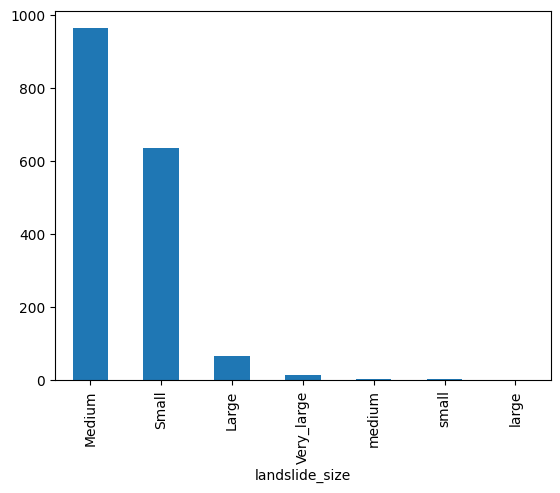

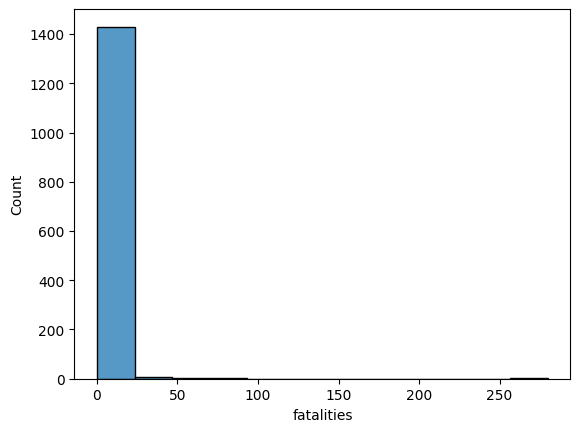

In [ ]:
df['landslide_size'].value_counts().plot(kind='bar')  # Distribuição do tamanho dos deslizamentos
plt.show()

sns.histplot(df['fatalities'])  # Histograma do número de fatalidades
plt.show()

## Imputar Valores Ausentes nas Colunas Restantes

In [ ]:
# Imputar a mediana para valores ausentes na coluna 'population'
df['population'] = df['population'].fillna(df['population'].median())

# Imputar 0 para valores ausentes na coluna 'fatalities'
df['fatalities'] = df['fatalities'].fillna(0)

# Imputar a mediana para valores ausentes na coluna 'distance'
df['distance'] = pd.to_numeric(df['distance'], errors='coerce') #Converter para numerico antes de imputar
df['distance'] = df['distance'].fillna(df['distance'].median())

# Imputar valores ausentes na coluna 'trigger' com a moda
df['trigger'] = df['trigger'].fillna(df['trigger'].mode()[0])

# Preencher valores ausentes em colunas de texto com 'Unknown'
df['location_description'] = df['location_description'].fillna('Unknown')
df['storm_name'] = df['storm_name'].fillna('Unknown')
df['source_name'] = df['source_name'].fillna('Unknown')

In [ ]:
label_encoder = LabelEncoder()
df['landslide_type'] = label_encoder.fit_transform(df['landslide_type'])
df['trigger'] = label_encoder.fit_transform(df['trigger'])
df['location_description'] = label_encoder.fit_transform(df['location_description'])
df['storm_name'] = label_encoder.fit_transform(df['storm_name'])
df['source_name'] = label_encoder.fit_transform(df['source_name'])
df['continent_code'] = label_encoder.fit_transform(df['continent_code'])
df['country_name'] = label_encoder.fit_transform(df['country_name'])
df['country_code'] = label_encoder.fit_transform(df['country_code'])
df['state/province'] = label_encoder.fit_transform(df['state/province'])
df['city/town'] = label_encoder.fit_transform(df['city/town'])

In [ ]:
features = ['latitude', 'longitude', 'population', 'landslide_type', 'trigger', 'distance', 'continent_code', 'country_code', 'state/province', 'city/town']  # Adicione mais features se desejar
alvo = 'landslide_size'

In [ ]:
df['landslide_size'] = label_encoder.fit_transform(df['landslide_size'])

In [ ]:
X = df[features]
y = df[alvo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy}")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.6194690265486725
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        12
           1       0.69      0.71      0.70       209
           2       0.50      0.54      0.52       112
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.62       339
   macro avg       0.25      0.22      0.23       339
weighted avg       0.60      0.62      0.61       339



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Simular Dados de Sensores

In [ ]:
import random

def gerar_dados_sensores(cenario):
    """Gera dados de sensores simulados com base no cenário."""
    if cenario == "Baixo Risco":
        precipitacao = random.uniform(0, 5)  # mm/dia
        umidade_solo = random.uniform(0.2, 0.5) # 0 a 1
        inclinacao = random.uniform(0, 10)  # graus
    elif cenario == "Médio Risco":
        precipitacao = random.uniform(10, 20)
        umidade_solo = random.uniform(0.6, 0.8)
        inclinacao = random.uniform(15, 25)
    else:  # Alto Risco
        precipitacao = random.uniform(30, 50)
        umidade_solo = random.uniform(0.9, 1.0)
        inclinacao = random.uniform(30, 45)

    # Retornar os dados em formato de dicionário
    return {"precipitacao": precipitacao, "umidade_solo": umidade_solo, "inclinacao": inclinacao}

In [ ]:
df['precipitacao'] = 0.0  # Inicializa com valores padrão
df['umidade_solo'] = 0.0
df['inclinacao'] = 0.0

def aplicar_cenario(row):
    """Aplica um cenário aleatório a cada linha do DataFrame (simulação)."""
    cenarios = ["Baixo Risco", "Médio Risco", "Alto Risco"]
    cenario_escolhido = random.choice(cenarios)
    dados_sensores = gerar_dados_sensores(cenario_escolhido)
    row['precipitacao'] = dados_sensores['precipitacao']
    row['umidade_solo'] = dados_sensores['umidade_solo']
    row['inclinacao'] = dados_sensores['inclinacao']
    return row

# Aplica a simulação a cada linha do DataFrame
df = df.apply(aplicar_cenario, axis=1)

In [ ]:
def simular_gateway(cenario):
    """Simula um gateway que recebe dados dos sensores e envia para o modelo."""
    dados_sensores = gerar_dados_sensores(cenario)

    # Pré-processar os dados (ex: normalizar, converter unidades)
    # ...

    # Enviar os dados para o modelo
    # (Nesta simulação, vamos apenas imprimir os dados e a previsão)
    print(f"Dados recebidos do sensor: {dados_sensores}")

    # Criar um DataFrame com os dados para o modelo
    df_temp = pd.DataFrame([dados_sensores])

    # Adicionar as colunas faltantes com valores padrão
    df_temp['latitude'] = 0  # Valor dummy
    df_temp['longitude'] = 0 # Valor dummy
    df_temp['population'] = df['population'].median() #valor retirado do dataframe original
    df_temp['distance'] = df['distance'].median() #valor retirado do dataframe original
    df_temp['continent_code'] = 1 # Valor dummy
    df_temp['country_code'] = 1 # Valor dummy
    df_temp['state/province'] = 1 # Valor dummy
    df_temp['city/town'] = 1 # Valor dummy
    df_temp['landslide_type'] = 1  # Valor dummy
    df_temp['trigger'] = 1 # Valor dummy

    # Converter as features para o tipo numérico e imputar valores faltantes
    df_temp['precipitacao'] = pd.to_numeric(df_temp['precipitacao'], errors='coerce').fillna(0)
    df_temp['umidade_solo'] = pd.to_numeric(df_temp['umidade_solo'], errors='coerce').fillna(0)
    df_temp['inclinacao'] = pd.to_numeric(df_temp['inclinacao'], errors='coerce').fillna(0)


    # Selecionar apenas as features que o modelo espera
    X_novo = df_temp[['latitude', 'longitude', 'population', 'landslide_type', 'trigger', 'distance', 'continent_code', 'country_code', 'state/province', 'city/town', 'precipitacao', 'umidade_solo', 'inclinacao']]

    # Escalar as features usando o mesmo scaler do treinamento
    X_novo_escalado = scaler.transform(X_novo)

    # Fazer a previsão
    previsao = model.predict(X_novo_escalado)[0]

    print(f"Previsão do modelo: Tamanho do deslizamento = {previsao}")

    # Acionar alertas (simulado)
    if previsao == 2:  # Alto Risco (dependendo do seu LabelEncoder)
        print("ALERTA: Risco de deslizamento alto!")

In [ ]:
def aplicar_cenario(row):
    """Aplica um cenário aleatório a cada linha do DataFrame (simulação)."""
    cenarios = ["Baixo Risco", "Médio Risco", "Alto Risco"]
    cenario_escolhido = random.choice(cenarios)
    dados_sensores = gerar_dados_sensores(cenario_escolhido)
    row['precipitacao'] = dados_sensores['precipitacao']
    row['umidade_solo'] = dados_sensores['umidade_solo']
    row['inclinacao'] = dados_sensores['inclinacao']
    return row

# Aplica a simulação a cada linha do DataFrame
df = df.apply(aplicar_cenario, axis=1)

# Definir features e alvo
features = ['latitude', 'longitude', 'population', 'landslide_type', 'trigger', 'distance', 'continent_code', 'country_code', 'state/province', 'city/town', 'precipitacao', 'umidade_solo', 'inclinacao']

alvo = 'landslide_size'

# Dividir dados em treinamento e teste
X = df[features]
y = df[alvo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Simular o sistema IoT para diferentes cenários
simular_gateway("Baixo Risco")
simular_gateway("Médio Risco")
simular_gateway("Alto Risco")

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy}")

# Exibir relatório de classificação
print(classification_report(y_test, y_pred))

Dados recebidos do sensor: {'precipitacao': 4.264856671782954, 'umidade_solo': 0.2885847402302043, 'inclinacao': 7.6892066551633445}
Previsão do modelo: Tamanho do deslizamento = 1
Dados recebidos do sensor: {'precipitacao': 13.294645330392731, 'umidade_solo': 0.6114649415206362, 'inclinacao': 20.85402960809951}
Previsão do modelo: Tamanho do deslizamento = 1
Dados recebidos do sensor: {'precipitacao': 34.44689603742336, 'umidade_solo': 0.9210451354713831, 'inclinacao': 42.161406735567944}
Previsão do modelo: Tamanho do deslizamento = 1
Acurácia do modelo: 0.6194690265486725
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        12
           1       0.69      0.71      0.70       209
           2       0.50      0.54      0.52       112
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                          

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
